In [1]:
# Class to colorize, bold, or underline outpu
class color:
    PURPLE = '\033[95m'
    CYAN = '\033[96m'
    DARKCYAN = '\033[36m'
    BLUE = '\033[94m'
    GREEN = '\033[92m'
    YELLOW = '\033[93m'
    RED = '\033[91m'
    BOLD = '\033[91m'
    UNDERLINE = '\033[4m'
    END = '\033[0m'
    
#
import pandas as pd
import numpy as np

# Normalization: rescales the values into a range of [0, 1]
data = np.array([[999999, 2, 0, 9],[35, 8, 4, 7], [27, 23, 1, 99]])
data_raw = pd.DataFrame({'Column1': data[:, 0], 'Column2': data[:, 1], 'Column3': data[:, 2], 'Column4': data[:, 3]})
print(color.BOLD + color.PURPLE + "\nData before normalization" + color.END)
print(data_raw)
from sklearn import preprocessing

# Normalize the data attributes.
normalized_data = preprocessing.normalize(data)
dataset = pd.DataFrame({'Column1': normalized_data[:, 0], 'Column2': normalized_data[:, 1], 'Column3': normalized_data[:, 2], 'Column4': normalized_data[:, 3]})
print(color.BOLD + color.PURPLE + "\nData after normalization" + color.END)
print(dataset)
    
    


Data before normalization
   Column1  Column2  Column3  Column4
0   999999        2        0        9
1       35        8        4        7
2       27       23        1       99

Data after normalization
    Column1   Column2   Column3   Column4
0  1.000000  0.000002  0.000000  0.000009
1  0.951171  0.217411  0.108705  0.190234
2  0.256736  0.218701  0.009509  0.941364


In [2]:
# Standardization: rescales data to have a mean of 0 and a standard deviation of 1 (unit variance).
from sklearn.preprocessing import StandardScaler
data = np.array([[999999, 2, 0, 9],[35, 8, 4, 7], [27, 23, 1, 99]])
data_raw = pd.DataFrame({'Column1': data[:, 0], 'Column2': data[:, 1], 'Column3': data[:, 2], 'Column4': data[:, 3]})
print(color.BOLD + color.PURPLE + "\nData before standardization" + color.END)
print(data_raw)
standardization_data = StandardScaler().fit_transform(data_raw)
dataset = pd.DataFrame({'Column1': standardization_data[:, 0], 'Column2': standardization_data[:, 1], 'Column3': standardization_data[:, 2], 'Column4': standardization_data[:, 3]})
print(color.BOLD + color.PURPLE + "\nData after standardization" + color.END)
print(dataset)


Data before standardization
   Column1  Column2  Column3  Column4
0   999999        2        0        9
1       35        8        4        7
2       27       23        1       99

Data after standardization
    Column1   Column2   Column3   Column4
0  1.414214 -1.019049 -0.980581 -0.683672
1 -0.707098 -0.339683  1.372813 -0.730286
2 -0.707115  1.358732 -0.392232  1.413957


In [7]:
# Categorical Binning Example
countries = pd.Series([
        'United States',
        'Canada',
        'Spain',
        'Italy',
        'Chile',
        'Brazil',
        'North Korea',
        'Vietnam',
        'Thailand',
        'Malaysia',
        'Mayanmar',
        'Iceland',
        'Germany',
        'Cuba',
        'Mexico'
    ], name = "Countries")

groups = {
        'North America': ('United States', 'Canada', 'Iceland', 'Greenland', 'Mexico'), 
        'Europe': ('France', 'Germany', 'United Kingdom', 'Belgium', 'Spain', 'Italy', 'Poland'), 
        'South America': ('Chile', 'Brazil', 'Peru', 'Colombia', 'Ecuador'),
        'Asia': ('North Korea', 'Vietnam', 'Thailand', 'Malaysia', 'Mayanmar')
    }
from typing import Any

def country_group_map(series: pd.Series, groups: dict,
                      othervalue: Any=-1) -> pd.Series:
    # Assign the dictionary pairs
    groups = {z: j for j, r in groups.items() for z in r}
    return series.map(groups).fillna(othervalue)

grouped_countries = country_group_map(countries, groups, othervalue='other')
df = pd.concat([countries.rename('Countries'), grouped_countries.rename('Grouped Countries')], axis=1)
print(color.BOLD + color.PURPLE + "\nCountry by region" + color.END)
df


Country by region


,Countries,Grouped Countries
0,United States,North America
1,Canada,North America
2,Spain,Europe
3,Italy,Europe
4,Chile,South America
5,Brazil,South America
6,North Korea,Asia
7,Vietnam,Asia
8,Thailand,Asia
9,Malaysia,Asia


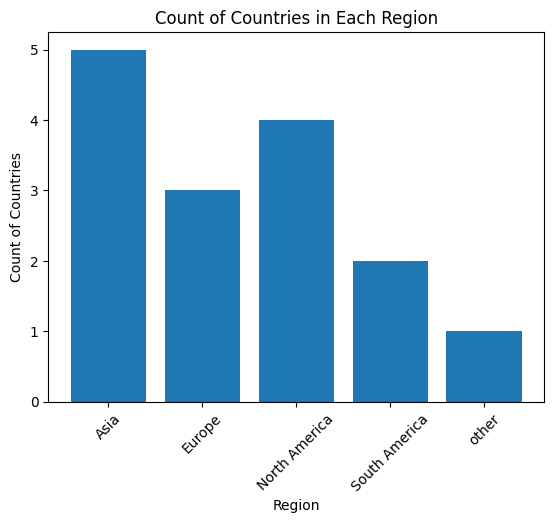

In [9]:
import matplotlib.pyplot as plt

# Grouping by 'Grouped Countries' and counting occurrences
data = df.groupby('Grouped Countries').count()

# Plotting the count of countries in each region
plt.bar(data.index, data['Countries'])
plt.xlabel('Region')
plt.ylabel('Count of Countries')
plt.title('Count of Countries in Each Region')
plt.xticks(rotation=45)
plt.show()
